# А/В-тест для интернет-магазина: увеличение выручки

## Описание проекта

Проект посвящен анализу гипотез и проведению А/В-теста для интернет-магазина, руководство которого стремится к увеличению выручки с продаж. 


__Цель проекта__: увеличить выручку интернет-магазина.

__Задачи__:

1) Отсортировать гипотезы по увеличению выручки по степени их приоритетности;

2) Провести А/В-тестирование и интерпретировать полученные результаты.

Для решения поставленных задач мы: 

0.1. Проведём предобработку данных;

1.1. Прменим модель ICE к представленным гипотезам, чтобы определить степень приоритетности;

1.2. Прменим модель RICE к представленным гипотезам, чтобы определить степень приоритетности;

1.3. Сравним полученные результаты от применеия разных моделей;

2.1. Проанализируем данные по кумулятивной выручке по группам;

2.2. Проанализируем данные по кумулятивному среднему чеку по группам;

2.3. Проанализируем относительные изменения кумулятивного среднего чека группа к группе;

2.4. Проанализируем кумулятивную конверсию по группам;

2.5. Проанализируем относительные изменения кумулятивной конверсии по группам;

2.6. Проанализируем количество заказов по пользователям;

2.7. Определим 95-й и 99-й перцентили заказов по пользователям;

2.8. Проанализируем стоимость заказов;

2.9. Определим 95-й и 99-й перцентили стоимости заказов;

2.10. Проанализируем статистическую значимость различий в конверсии между группами по «сырым» данным;

2.11. Проанализируем статистическую значимость различий в величине среднего чека между группами по «сырым» данным;

2.12. Проанализируем статистическую значимость различий в конверсии между группами по «очищенным» данным;

2.13. Проанализируем статистическую значимость различий в величине среднего чека между группами по «очищенным» данным;

2.14. На основании полученных данных примем решение об успешности/неуспешности А/В-теста.


## Предобработка данных

Загрузим необходимые для проекта библиотеки.

In [2]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

Загрузим датасеты.

In [3]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

except:
    hypothesis = pd.read_csv('C:/Users/Пользователь/Downloads/hypothesis.csv')
    orders = pd.read_csv('C:/Users/Пользователь/Downloads/orders.csv', sep=',')
    visitors = pd.read_csv('C:/Users/Пользователь/Downloads/visitors.csv', sep=',')

Отформатируем значение в столбуе с датой/временем.

In [4]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
#orders['date'] = orders['date'].map(
    #lambda x: dt.datetime.strptime(x, '%Y/%m/%d'))

#visitors['date'] = visitors['date'].map(
    #lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

Получим информацию о датасетах. 
Проверим, есть ли в дубликаты значений.

In [5]:
hypothesis.info()
pd.set_option('display.max_colwidth', None)
display(hypothesis.duplicated().sum())
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


0

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
orders.info()
display(orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


0

In [7]:
visitors.info()
display(visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


0

Аномалий в датасетах мы не обнаружили. Дубликатов явных нет. Всё, что было нужно отформатировали.

## Приоритезация гипотез

Отсортируем гипотезы в датасете, применив к ним модели RICE и ICE. 

In [8]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'] 

display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Применив метод ICE, мы установили, что самые четыре самые перспективные гипотезы: 

- Запустить акцию, дающую скидку на товар...;

- Добавить новые каналы привлечения трафика...;

- Добавить форму подписки на все основные страницы...;

- Показать на главной странице баннеры ...


In [9]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']) / hypothesis['Efforts']

display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Применив модель RICE, мы установили, что самыми перспективными гипотезами являются:

- Добавить форму подписки на все основные страницы...;

- Добавить блоки рекомендаций товаров...;

- Добавить два новых канала привлечения трафика...;

- Показать на главной странице баннеры...;

Применив две модели мы получили отличные друг от друга результаты. Модель RICE также учитывает охват аудитории (reach). А у гипотезы про добавление формы подписки этот критерий самый высокий из всего дата сета. Это позволило ей оказаться "победителем" при использовании модели RICE.  

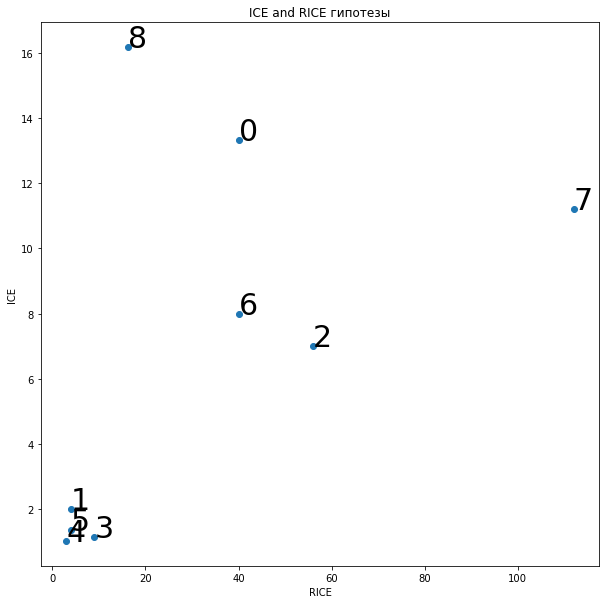

In [10]:
y = hypothesis['ICE'] 
z = hypothesis['RICE'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()   

## Анализ A/B-теста

### График кумулятивной выручки по группам

Составим таблицу кумулятивныой выручки по группам, объединив данные по датасетам с посетителями и с заказами.

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим график кумулятивной выручки по группам.

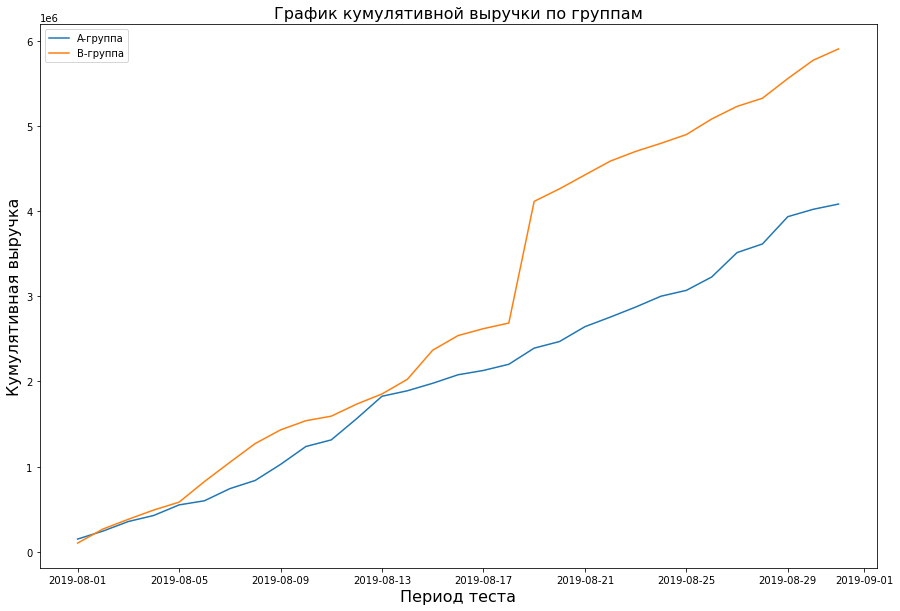

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A-группа')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B-группа')
plt.title('График кумулятивной выручки по группам',  fontsize=16)
plt.ylabel("Кумулятивная выручка",  fontsize=16)
plt.xlabel("Период теста",  fontsize=16)
plt.legend() ;

На графике видим, что выручка растёт в обеих группах. Но в середине тестрирования в В-группе происходит резкий скачок выручки. 
Это могло стать результатом как качественного улучшения в рамках исследуемой группы (стали больше покупать), так и "всплеска" (единичных и случайных супер-дорогих заказов). 

### График кумулятивного среднего чека по группам

Построим график среднего чека по группам.

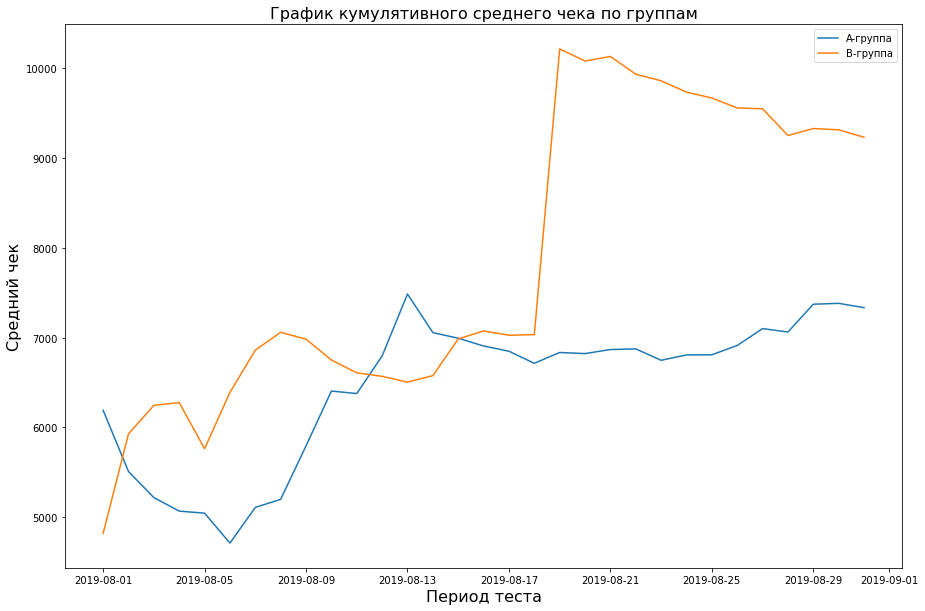

In [13]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A-группа')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B-группа')
plt.title('График кумулятивного среднего чека по группам', fontsize=16)
plt.ylabel("Средний чек", fontsize=16)
plt.xlabel("Период теста", fontsize=16)
plt.legend() ;

На графике видим, что резкий рост среднего чека характерен для обеих групп. Очень похоже на влияние очень дорогих заказов на величину чека. В целом величина среднего чека в В-группе выше. 

### График относительного изменеия кумулятивного среднего чека группа к группе

Пострим график, на котором будет наглядно видно в какой группе средний чек больше.

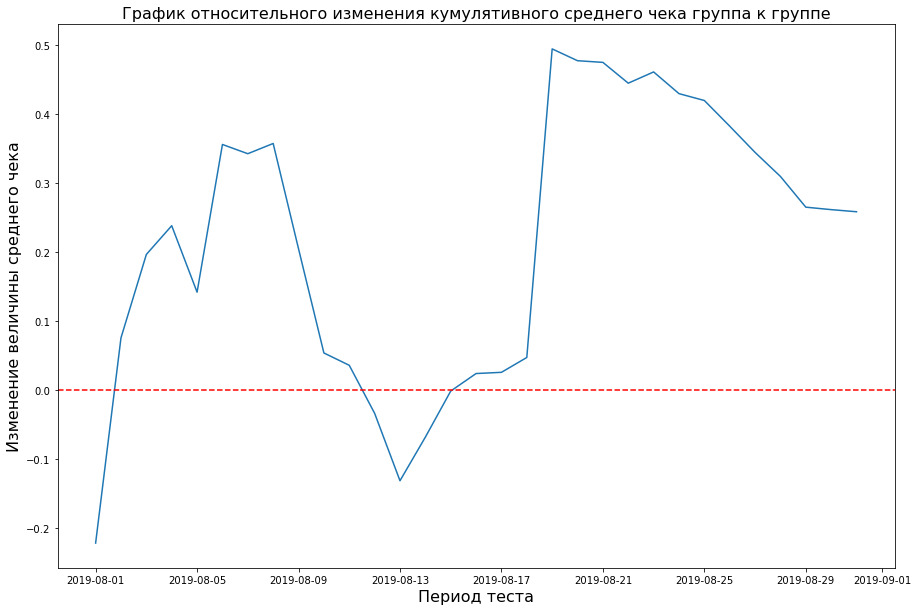

In [14]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])



plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группа к группе', fontsize=16)
plt.ylabel("Изменение величины среднего чека", fontsize=16)
plt.xlabel("Период теста", fontsize=16)
plt.axhline(y=0, color='red', linestyle='--') ;

На графике видим, что чек в В-группе местами выше в полтора раза. Однако эта величина подвержена сильным колебаниям. 

### График кумулятивной конверсии по группам.

Визуализируем конверсию по группам.

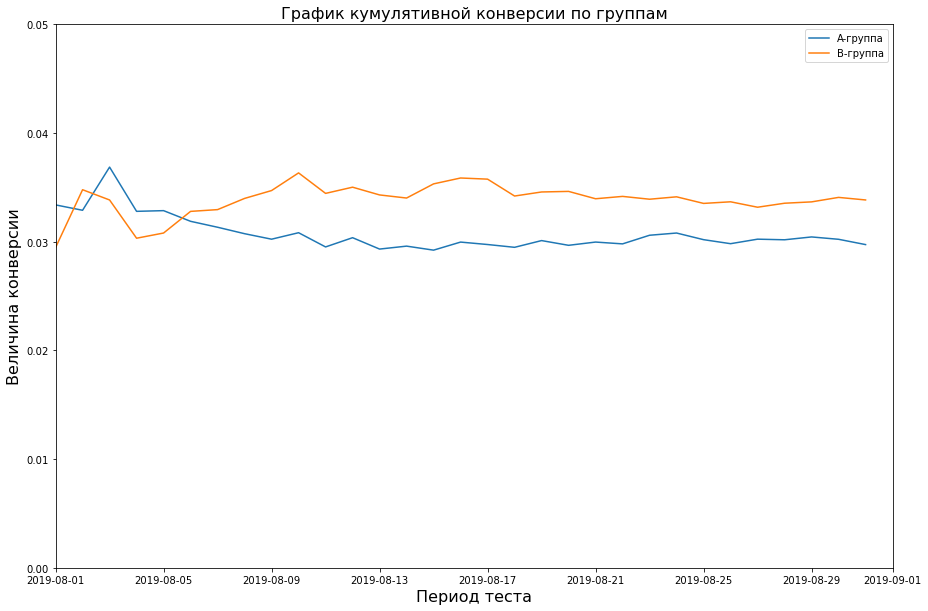

In [15]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15, 10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A-группа')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B-группа')
plt.title('График кумулятивной конверсии по группам',  fontsize=16)
plt.ylabel("Величина конверсии", fontsize=16)
plt.xlabel("Период теста",  fontsize=16)
plt.legend()

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]) ;

Видим на графике, что в В-групппе более высокая конверсия.

### График относительного прироста конверсии В-группы к А-группе.

Посторим график относительного прироста конвесрии группа к группе.

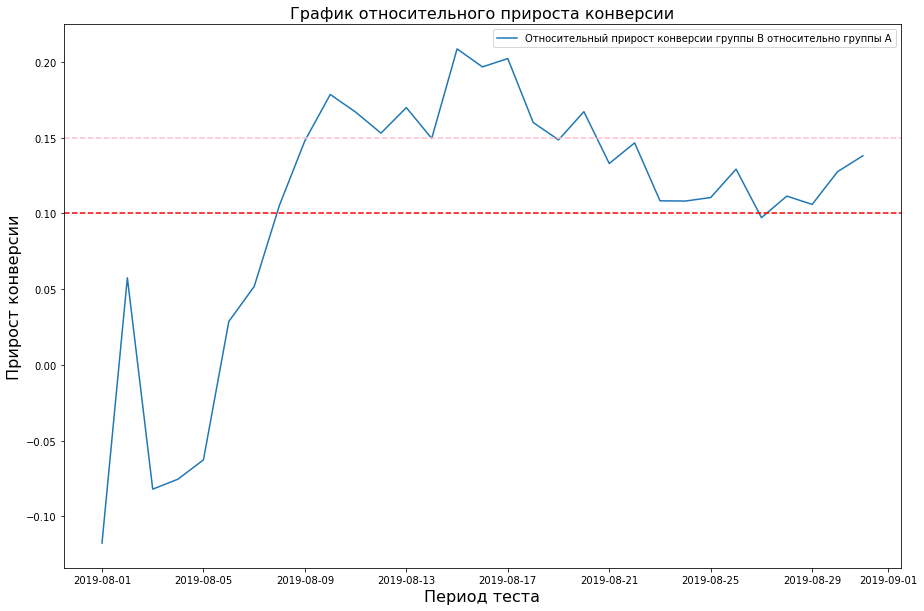

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного прироста конверсии', fontsize=16)
plt.ylabel("Прирост конверсии", fontsize=16)
plt.xlabel("Период теста", fontsize=16)
plt.legend() 
plt.axhline(y=0.1, color='red', linestyle='--')
plt.axhline(y= 0.15, color='pink', linestyle='--') ;

На графике видим, что почти за всё время проведения теста конверсия в В-группе была стабильно выше 10%. 

### График количества заказов

Проанализируем количество заказзов.

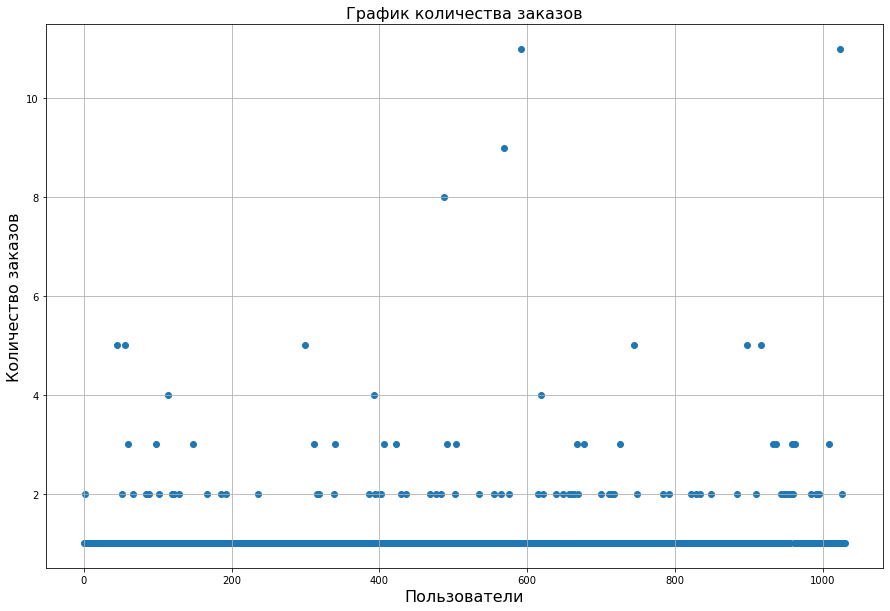

In [17]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'transactionId']

plt.figure(figsize=(15, 10))
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionId'])

plt.grid()
plt.title('График количества заказов', fontsize=16) 
plt.xlabel('Пользователи', fontsize=16)
plt.ylabel('Количество заказов', fontsize=16);

На графике видим, что пользоваетли обычно делают один заказ. Значительно реже - два. Больше двух совсем крайне редко. Максимальное количество заказов на пользователя - 11. Таких пользователей двое.

### Перцентили количества заказов

In [18]:
display(np.percentile(ordersByUsers['transactionId'], [95, 99]))

array([2., 4.])

Можно считать, что нормальным является до двух заказов на пользователя. Таких заказов 95%. 

### Проанализируем стоимость заказов.

Применим метод describe() к датасету orders.
Посмотрим на самые большие заказы.

In [19]:
display(orders['revenue'].describe())
display(orders.sort_values(by='revenue', ascending=False).head(10))

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Средний заказ около 83 тысяч, хотя величина второго квартиля - 29 тысяч. Несколько крупных заказов влияют на данные. Особенно единичный заказ на 1.3 миллиона. Отметим, что в В-группе были сделаны два самых дорогих заказа по обеим группам.

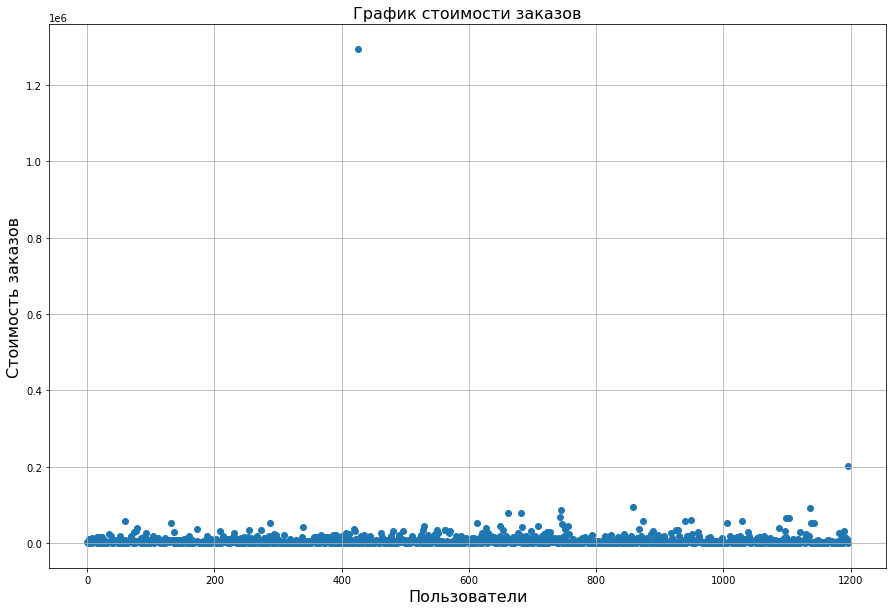

In [20]:
plt.figure(figsize=(15, 10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('График стоимости заказов', fontsize=16)
plt.xlabel('Пользователи',  fontsize=16)
plt.ylabel('Стоимость заказов',  fontsize=16);

На графике видим, что аномальных заказов не так много, но они очень сильно влияют на общую картину.

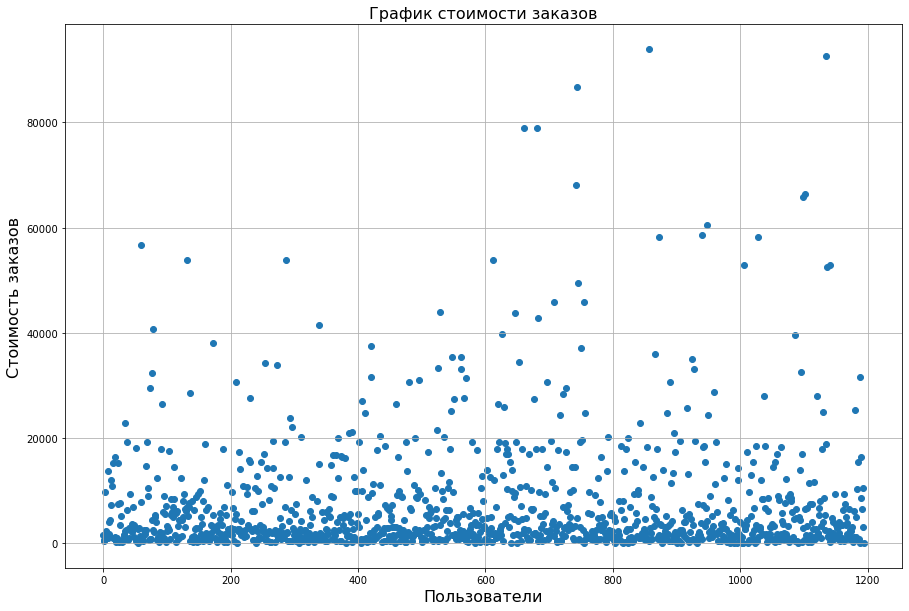

In [21]:
plt.figure(figsize=(15, 10))
orders_new = orders.query('revenue < 100000')
x_values = pd.Series(range(0, len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue'])
plt.grid()
plt.title('График стоимости заказов', fontsize=16)
plt.xlabel('Пользователи', fontsize=16)
plt.ylabel('Стоимость заказов', fontsize=16);

### Перцентили стоимости заказов.

In [22]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

Применив метод percentile из библиотеки numpy получили, что 95% заказов не превышают 28 тысяч. Заказы до этой суммы можно считать нормальными. Что интересно, лишь 1% заказов превышает 58 тысяч, при среднем значении в таблице в 83 тысячи...

### Различия в конверсии по "сырым" данным.

Сформулируем гипотезы.

Н0: конверсия в А-группе равна конверсии в В-группе. 

Н1: конверсия в А-группе НЕ равна конверсии в В-группе.

Для проверкм гипотез (этих и последующих) составим сводную таблицу куда войдут:

Количество заказов в выбранную дату для каждой группы;

Суммарная выручка в выбранную дату для каждой группы;

Суммарное число заказов до выбранной даты включительно для каждой группы;

Суммарная выручка до выбранной даты включительно для каждой группы;

Количество пользователей в выбранную дату для каждой группы;

Количество пользователей до выбранной даты включительно для каждой группы.

In [23]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Создадим две переменные для пользователей каждой группы, которые сделали хотя бы один заказ.

In [24]:

ordersByUsersA = (orders[orders['group']== 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = (orders[orders['group']== 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

Проверим выборку на критерий Манна-Уитни.

Для этого: 

- Для пользователей, которые не делали заказов поставим нули (разница между суммой посетителей и количеством записей о заказах). 

- создадим две переменные, где каждому пользователю, относящимуся к группам исследования, будет соотвествовать количество заказов. 

In [25]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


Применим критерий Манан-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.

Выведем относительный прирост среднего числа заказов группы B.

Для этого среднее число заказов группы B разделим на среднее число заказов группы A - 1. 

Округлим результат до трёх знаков после запятой.

In [26]:

print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Разница между конверсиями в группах А и В: {:.1%}'.format(sampleB.mean() / sampleA.mean() - 1))

p_value: 0.01679
Разница между конверсиями в группах А и В: 13.8%


Полученный результат меньше p-value, которое было равно 0.05. Значит, нулевую гипотезу о том, что конверсия в А-группе равна конверсии в В-группе, ОТВЕРГАЕМ. 

Относительный выигрыш В-группы в приросте заказов составляет 13.8%. 

### Различия в среднем чеке по "сырым" данным. 

Сформулируем гипотезы.

Н0: средний чек в А-группе равен среднему чеку в В-группе. 

Н1: средний чек в А-группе НЕ равен среднему чеку в В-группе.

Применим критерий Манна-Уитни к полученным данным о выручке от заказов.

Найдём относительные различия в среднем чеке между группами.

In [27]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Разница среднего чека между группами А и В: {:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value: 0.72929
Разница среднего чека между группами А и В: 25.9%


Полученный результат значительно больше p-value. Значит, нулевую гипотезу о равенстве среднего чека иежду группами, НЕ ОТВЕРГАЕМ. 

Впрочем, средний чек группы B значительно выше среднего чека группы A - на 25.9%. Разница в среднем чеке между группами не является  статистически значимой. 

### Различия в конверсии по "очищенным" данным.

Для начала очистим данные.

В шагах 4.7 и 4.9 мы определили, что нормальными являются пользователи, сделавшие не более двух заказов, и потратившие не более 28.000. Значит, искажением бубдт считаться пользователи с количетсвом заказов от трёх и суммой чека свыше 28.000.

Создадим две переменные для тех, кто много заказывал или много платил. 

Посчитаем их количество.

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['transactionId'], [95, 99])[0]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['transactionId'], [95, 99])[0]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


74 "абнормальных пользователя", которых мы исключим из нашего "чистого" исследования. Всего пользователей у нас 1197, количество "абнормальных" составляет 6.1%. Это чуть за гранью допустимого.  

Объявим две переменные с очищенными данными по группам.

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Сформулируем гипотезы.

Н0: конверсия в А-группе равна конверсии в В-группе. 

Н1: конверсия в А-группе НЕ равна конверсии в В-группе.

Применим критерий Манан-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.

Выведем относительный прирост среднего числа заказов группы B.

Для этого среднее число заказов группы B разделим на среднее число заказов группы A - 1. 

Округлим результат до трёх знаков после запятой.

In [30]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница между конверсиями в группах А и В: {:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p_value: 0.01304
Разница между конверсиями в группах А и В: 17.3%


Результат по "очищенным" данным такой же, как и по "сырым". Нулевую гипотезу о том, что конверсия в группах равна, ОТВЕРГАЕМ. 

### Различия в среднем чеке по "очищенным" данным.

Сформулируем гипотезы.

Н0: средний чек в А-группе равен среднему чеку в В-группе. 

Н1: средний чек в А-группе НЕ равен среднему чеку в В-группе.


Применим критерий Манна-Уитни к полученным данным о выручке от заказов.

Найдём относительные различия в среднем чеке между группами.

In [31]:
print(
    'p_value: {:.5f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Разница среднего чека между группами А и В: {:.1%}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p_value: 0.73848
Разница среднего чека между группами А и В: -2.0%


Полученный результат сильно больше p-value, равного 0.05. Значит, нулевую гипотезу о том, что средний чек в группах равен, мы НЕ ОТВЕРГАЕМ.
Однако по "очищенным" данным видим, что среднний чек в А-группе выше, чем в В-группе - на 2%. По "сырым" данным перевес был в пользу В-группы, причём значительный. Это может быть обьяснено, как мы видели на графиках, влиянием "абнормальных" пользователей (количество заказов и стоимость заказов).   

### Решение по результатам.

Остановить, признать успешным. Победила В-группа.

Значимое различие по конверсии заказов между группами ПРИСУТСВУЕТ и по «сырым», и по "очищенным" даным. Конверсия В-группы выше, чем А-группы;

Статистически значимые различия по среднему чеку между группами ОТСУТСВУЮТ ии по «сырым», и по "очищенным" данным;

График различия конверсии между группами сообщает, что результаты В-группы лучше A-группы и присутсвует тенденция к улучшению;
  
График различия среднего чека говорит о том, что результаты B-группы лучше, чем у А-группы. Однако, сильное влияние на средний чек В-группы оказали всего два "абнормальных" заказа, один из них в 7.2 раза больше нормального значения в 28.000, другой в 42 раза.

Целью проведения А/В-теста было увеличение выручки. Существенное изменение в выручке не обнаружено. Однако, в В-группе наблюдается более высокий уровень конверсии, что со временем может привести к увеличению продаж и, как следствие, росту выручки. Исходя из этого, прделагаем __ОСТАНОВИТЬ А/В-тестрирование и зафиксировать отсутсвие различия между группами__

## Вывод

Нами была проведена подготовительная работа по обработке данных;

Отобраны гипотезы по степени приоритизации, по результатам применения моделей ICE и RICE;

Самой перспективной является гипотеза о добавлении подписки для пользователей. Эта гипотеза имеет наибольший охват аудитории;

На графиках, связанных с конверсией, выручкой и величиной среднего чека, мы увидели превосходство В-группы;

Проанализировав 95-й и 99-й перцентили количетсва и стоимости заказов, мы пришли к выводу, что "нормальным" для пользователей является совершение до двух покупок на сумму до 28.000;

Были выявлены аномально высокие заказы, которые скажали "сырые" данные.

Значимое различие по конверсии заказов между группами ПРИСУТСВУЕТ и по «сырым», и по "очищенным" даным. Конверсия В-группы выше, чем А-группы;

Статистически значимые различия по среднему чеку между группами ОТСУТСВУЮТ ии по «сырым», и по "очищенным" данным;

По результатам А/В-теста прироста выручки не выявлено. Однако более высокая конверсия в В-группе со временем может приветси к росту выручки;

Предлагается продолжить проведение А/В-теста.